In [8]:
import pandas as pd 
import numpy as np
from datetime import datetime, timedelta
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [9]:
# Load data
data = pd.read_excel("data.xlsx", sheet_name="data")
data['Dates'] = pd.to_datetime(data['Dates'])
data.set_index('Dates', inplace=True)

In [10]:
df = np.log(data / data.shift(1)).dropna()

In [12]:
# Define the event and estimation windows
event_date = datetime(2024, 11, 6)
estimation_window = 250
event_before = 3
event_after = 3
event_estimation_between = 10

In [13]:
# Calculate the start and end dates for the event window
event_index = df.index.get_loc(event_date) 
event_start_index = event_index - event_before
event_end_index = event_index + event_after

event_start_date = df.index[event_start_index]
event_end_date = df.index[event_end_index]

# Select the event window
event_data = df.loc[event_start_date:event_end_date]

# Calculate the end date for the estimation window
estimation_end_index = event_index - event_before - event_estimation_between 
estimation_end_date = df.index[estimation_end_index]

# Select the estimation window
estimation_data = df.loc[:estimation_end_date].iloc[-estimation_window:]



# Select the data between estimation and event data for plotting
between_start_index = estimation_end_index + 1
between_end_index = event_start_index - 1

between_start_date = df.index[between_start_index]
between_end_date = df.index[between_end_index]

between_data = df.loc[between_start_date:between_end_date]

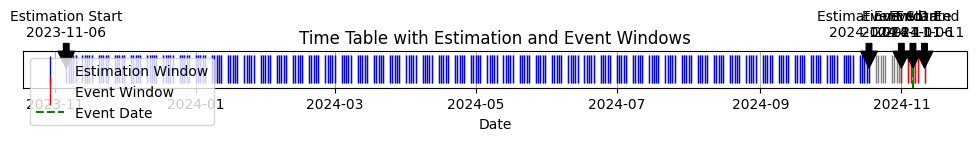

In [14]:
# Plot the time table from the first day of the estimation window
plt.figure(figsize=(10, 2))
plt.plot(df.loc[estimation_data.index[0]:].index, [1]*len(df.loc[estimation_data.index[0]:]), '|', color='gray', markersize=20)
plt.plot(estimation_data.index, [1]*len(estimation_data), '|', color='blue', markersize=20, label='Estimation Window')
plt.plot(event_data.index, [1]*len(event_data), '|', color='red', markersize=20, label='Event Window')
plt.axvline(event_date, color='green', linestyle='--', label='Event Date')

# Annotate the exact dates on the plot
plt.annotate(f'Estimation Start\n{estimation_data.index[0].strftime("%Y-%m-%d")}', 
             xy=(estimation_data.index[0], 1), xytext=(estimation_data.index[0], 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
plt.annotate(f'Estimation End\n{estimation_end_date.strftime("%Y-%m-%d")}', 
             xy=(estimation_end_date, 1), xytext=(estimation_end_date, 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
plt.annotate(f'Event Start\n{event_start_date.strftime("%Y-%m-%d")}', 
             xy=(event_start_date, 1), xytext=(event_start_date, 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
plt.annotate(f'Event Date\n{event_date.strftime("%Y-%m-%d")}', 
             xy=(event_date, 1), xytext=(event_date, 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
plt.annotate(f'Event End\n{event_end_date.strftime("%Y-%m-%d")}', 
             xy=(event_end_date, 1), xytext=(event_end_date, 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')

plt.yticks([])
plt.legend(loc='upper left')
plt.title('Time Table with Estimation and Event Windows')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

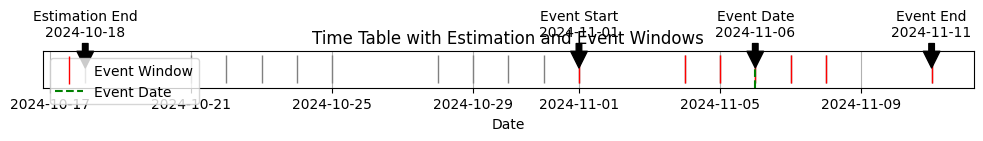

In [15]:
# Plot the time table from the last day of the estimation window
plt.figure(figsize=(10, 2))
plt.plot(df.loc[estimation_end_date:].index, [1]*len(df.loc[estimation_end_date:]), '|', color='gray', markersize=20)
plt.plot(event_data.index, [1]*len(event_data), '|', color='red', markersize=20, label='Event Window')
plt.axvline(event_date, color='green', linestyle='--', label='Event Date')

# Annotate the exact dates on the plot
plt.annotate(f'Estimation Start\n{estimation_data.index[0].strftime("%Y-%m-%d")}', 
             xy=(estimation_data.index[0], 1), xytext=(estimation_data.index[0], 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
plt.annotate(f'Estimation End\n{estimation_end_date.strftime("%Y-%m-%d")}', 
             xy=(estimation_end_date, 1), xytext=(estimation_end_date, 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
plt.annotate(f'Event Start\n{event_start_date.strftime("%Y-%m-%d")}', 
             xy=(event_start_date, 1), xytext=(event_start_date, 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
plt.annotate(f'Event Date\n{event_date.strftime("%Y-%m-%d")}', 
             xy=(event_date, 1), xytext=(event_date, 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
plt.annotate(f'Event End\n{event_end_date.strftime("%Y-%m-%d")}', 
             xy=(event_end_date, 1), xytext=(event_end_date, 1.1),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')

plt.yticks([])
plt.legend(loc='upper left')
plt.title('Time Table with Estimation and Event Windows')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
# Construct green, brown and green-brown factors
estimation_data['green factor'] = estimation_data[['CELS Index', 'ECO Index', 'SPGTCED Index', 'RENIXX Index', 'GWE Index',
       'SUNIDX Index']].mean(axis=1)
estimation_data['brown factor'] = estimation_data[['SPXIOGUP Index', 'FA0530U Index', 'AWOGPU Index',
       'DJSOEP Index', 'EZKTR Index']].mean(axis=1)

event_data['green factor'] = event_data[['CELS Index', 'ECO Index', 'SPGTCED Index', 'RENIXX Index', 'GWE Index',
       'SUNIDX Index']].mean(axis=1)
event_data['brown factor'] = event_data[['SPXIOGUP Index', 'FA0530U Index', 'AWOGPU Index',
       'DJSOEP Index', 'EZKTR Index']].mean(axis=1)

between_data['green factor'] = between_data[['CELS Index', 'ECO Index', 'SPGTCED Index', 'RENIXX Index', 'GWE Index',
       'SUNIDX Index']].mean(axis=1)
between_data['brown factor'] = between_data[['SPXIOGUP Index', 'FA0530U Index', 'AWOGPU Index',
       'DJSOEP Index', 'EZKTR Index']].mean(axis=1)

estimation_data['green - brown'] = estimation_data['green factor'] - estimation_data['brown factor'] 
event_data['green - brown'] = event_data['green factor'] - event_data['brown factor'] 
between_data['green - brown'] = between_data['green factor'] - between_data['brown factor']


In [17]:
def calculate_expected_returns(estimation_data, event_data, risk_free_rate=0, model='market'):
    market_returns = estimation_data['CRSPTM1 Index']
    expected_returns = {}
    
    for column in estimation_data.columns:
        if column != 'CRSPTM1 Index':
            if model == 'mean':
                # Mean Model
                mean_return = np.mean(estimation_data[column])
                expected_returns[column] = mean_return
            
            elif model == 'capm':
                # CAPM
                beta = np.cov(estimation_data[column], market_returns)[0][1] / np.var(market_returns)
                market_premium = event_data['CRSPTM1 Index'] - risk_free_rate
                expected_returns[column] = risk_free_rate + beta * market_premium
            
            elif model == 'market':
                # Market Model
                beta = np.cov(estimation_data[column], market_returns)[0][1] / np.var(market_returns)
                alpha = np.mean(estimation_data[column]) - beta * np.mean(market_returns)
                expected_returns[column] = alpha + beta * event_data['CRSPTM1 Index']
    
    return expected_returns

def calculate_abnormal_returns(event_data, expected_returns):
    abnormal_returns = {}
    
    for column in event_data.columns:
        if column != 'CRSPTM1 Index':
            abnormal_returns[column] = event_data[column] - expected_returns[column]
    
    return abnormal_returns

def calculate_cumulative_abnormal_returns(abnormal_returns):
    cumulative_abnormal_returns = {}
    
    for column in abnormal_returns:
        cumulative_abnormal_returns[column] = abnormal_returns[column].cumsum()
    
    return cumulative_abnormal_returns

def perform_statistical_tests(estimation_data, abnormal_returns, cumulative_abnormal_returns):
    t_test_results_ar = {}
    t_test_results_car = {}
    
    for column in abnormal_returns:
        std_dev = np.std(estimation_data[column])
        t_values_ar = abnormal_returns[column] / std_dev
        p_values_ar = [2 * (1 - stats.t.cdf(np.abs(t), len(abnormal_returns[column]) - 1)) for t in t_values_ar]
        
        t_test_results_ar[column] = {'t_values': t_values_ar, 'p_values': p_values_ar}
        
        car_last_day = cumulative_abnormal_returns[column].iloc[-1]
        std_dev_car = std_dev * np.sqrt(len(cumulative_abnormal_returns[column]))
        t_value_car_last_day = car_last_day / std_dev_car
        p_value_car_last_day = 2 * (1 - stats.t.cdf(np.abs(t_value_car_last_day), len(cumulative_abnormal_returns[column]) - 1))
        
        t_test_results_car[column] = {'t_value': t_value_car_last_day, 'p_value': p_value_car_last_day}
    
    return t_test_results_ar, t_test_results_car

def add_significance_stars(value, p_values, method='standard'):
    if method == 'bonferroni':
        adjusted_p_values = [min(p * len(p_values), 1.0) for p in p_values]
    elif method == 'benjamini_hochberg':
        sorted_indices = np.argsort(p_values)
        adjusted_p_values = np.empty(len(p_values))
        for i, p in enumerate(np.array(p_values)[sorted_indices], start=1):
            adjusted_p_values[sorted_indices[i-1]] = min(p * len(p_values) / i, 1.0)
    else:
        adjusted_p_values = p_values
    
    return [f"{val*100:.3f}{'*' * (p < 0.1) + '*' * (p < 0.05) + '*' * (p < 0.01)}" for val, p in zip(value, adjusted_p_values)]


def create_dataframes(abnormal_returns, cumulative_abnormal_returns, t_test_results_ar, t_test_results_car, method='standard'):
    abnormal_df = pd.DataFrame({
        col: add_significance_stars(abnormal_returns[col], t_test_results_ar[col]['p_values'], method) 
        for col in abnormal_returns # p calculated for each dates individually, it may be used for all dates
    })
    
    cumulative_df = pd.DataFrame({
        col: [add_significance_stars([cumulative_abnormal_returns[col].iloc[-1]], [t_test_results_car[col]['p_value']], method)[0]]
        for col in cumulative_abnormal_returns
    })
    
    t_p_combined_df = pd.DataFrame({
        col: [f"{t:.3f} ({p:.3f})" for t, p in zip(t_test_results_ar[col]['t_values'], t_test_results_ar[col]['p_values'])]
        for col in t_test_results_ar
    })
    
    return abnormal_df, cumulative_df, t_p_combined_df

def export_to_excel(abnormal_df, cumulative_df, t_p_combined_df, t_test_results_car, filename='results_market_model_s.xlsx'):
    with pd.ExcelWriter(filename) as writer:
        abnormal_df.to_excel(writer, sheet_name='Abnormal Returns')
        cumulative_df.to_excel(writer, sheet_name='Cumulative Abnormal Returns')
        t_p_combined_df.to_excel(writer, sheet_name='T-Value (P-Value) AR')

        # Format the CAR results to 3 decimals
        car_df = pd.DataFrame({
            col: [f"{t_test_results_car[col]['t_value']:.3f} ({t_test_results_car[col]['p_value']:.3f})"]
            for col in t_test_results_car
        })
        car_df.to_excel(writer, sheet_name='T-Test Results CAR')
    print(f"Data has been successfully exported to '{filename}'.")

# Main execution
expected_returns = calculate_expected_returns(estimation_data, event_data)
abnormal_returns = calculate_abnormal_returns(event_data, expected_returns)
cumulative_abnormal_returns = calculate_cumulative_abnormal_returns(abnormal_returns)
t_test_results_ar, t_test_results_car = perform_statistical_tests(estimation_data, abnormal_returns, cumulative_abnormal_returns)
abnormal_df, cumulative_df, t_p_combined_df = create_dataframes(abnormal_returns, cumulative_abnormal_returns, t_test_results_ar, t_test_results_car, 'benjamini_hochberg')
export_to_excel(abnormal_df, cumulative_df, t_p_combined_df, t_test_results_car)

Data has been successfully exported to 'results_market_model_s.xlsx'.


In [18]:
# Plot results

In [19]:
def calculate_car_for_plot(estimation_data, between_data, event_data, risk_free_rate=0, model='market'):
    # Merge between data and event data
    merged_data = pd.concat([between_data, event_data])
    
    # Calculate expected returns using the provided function
    expected_ret = calculate_expected_returns(estimation_data, merged_data, risk_free_rate, model)
    
    # Calculate abnormal returns using the provided function
    abnormal_returns = calculate_abnormal_returns(merged_data, expected_ret)
    
    # Calculate cumulative abnormal returns using the provided function
    cumulative_abnormal_returns = calculate_cumulative_abnormal_returns(abnormal_returns)

    # Convert cumulative abnormal returns to DataFrame
    car_df = pd.DataFrame(cumulative_abnormal_returns)
    
    return car_df

In [20]:
def plot_cumulative_returns(cumulative_returns, event_date, event_start_date, event_end_date):
    # Rename the columns for the plot
    cumulative_returns.columns = ['Nasdaq Clean Edge Green Energy', 'Wilderhill Clean Energy', 'S&P Global Clean Energy', 'World Renewable Energy (Renixx)', 'ISE Global Wind Energy', 'MAC Global Solar Energy',
                                  'S&P 500 Integrated Oil & Gas', 'FTSE Local USA Oil & Gas & Coal', 'FTSE All World Oil & Gas & Coal', 'Dow Jones Select Oil Expl. & Prod.', 'Dynamic Energy Expl. & Prod. Intellindex']  # Example column names

    # List of assets for dashed green line and simple brown line
    dashed_green_assets = ['Nasdaq Clean Edge Green Energy', 'Wilderhill Clean Energy', 'S&P Global Clean Energy', 'World Renewable Energy (Renixx)', 'ISE Global Wind Energy', 'MAC Global Solar Energy']  # Example list of assets for dashed green line
    simple_brown_assets = ['S&P 500 Integrated Oil & Gas', 'FTSE Local USA Oil & Gas & Coal', 'FTSE All World Oil & Gas & Coal', 'Dow Jones Select Oil Expl. & Prod.', 'Dynamic Energy Expl. & Prod. Intellindex']  # Example list of assets for simple brown line

    # Ensure all values are zero at the first date
    cumulative_returns = cumulative_returns - cumulative_returns.iloc[0]

    # Multiply y-axis values by 100 to show in percent
    cumulative_returns *= 100

    # Plot all columns in the merged data frame with specified line styles for chosen columns
    plt.figure(figsize=(14, 8))
    for column in cumulative_returns.columns:
        if column in dashed_green_assets:
            plt.plot(cumulative_returns.index, cumulative_returns[column], label=column, linestyle='--', color='green', linewidth=2)
        elif column in simple_brown_assets:  # Example chosen column for simple brown line
            plt.plot(cumulative_returns.index, cumulative_returns[column], label=column, linestyle='-', color='brown', linewidth=2)

    # Add grid lines
    plt.grid(True)

    # Add a vertical line to a given date
    vertical_line_date = event_date  # Example date for vertical line
    plt.axvline(x=vertical_line_date, color='black', linestyle='--', linewidth=2)

    # Grey out the area between two dates
    start_grey_date = event_start_date  # Start date for greyed out area
    end_grey_date = event_end_date   # End date for greyed out area
    plt.axvspan(start_grey_date, end_grey_date, color='#F0F0F0')

    # Format x-axis dates to show only month and day, and rotate by 90 degrees
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator())
    plt.xticks(rotation=45, fontsize=13)
    plt.yticks(fontsize=13)
    plt.gca().set_xticks(cumulative_returns.index)

    plt.xlabel('Date', fontsize=15)
    plt.ylabel('CAR (%)', fontsize=15)

    # Set the minimum and maximum value of y-axis values
    #plt.ylim(-12.5, 12.5)  # Example range: -50% to 150%

    plt.legend(fontsize=15)

    # Save the plot as a PDF file in .eps format for use in LaTeX
    plt.savefig("cumulative_returns_plot.png", format='png')

    plt.show()

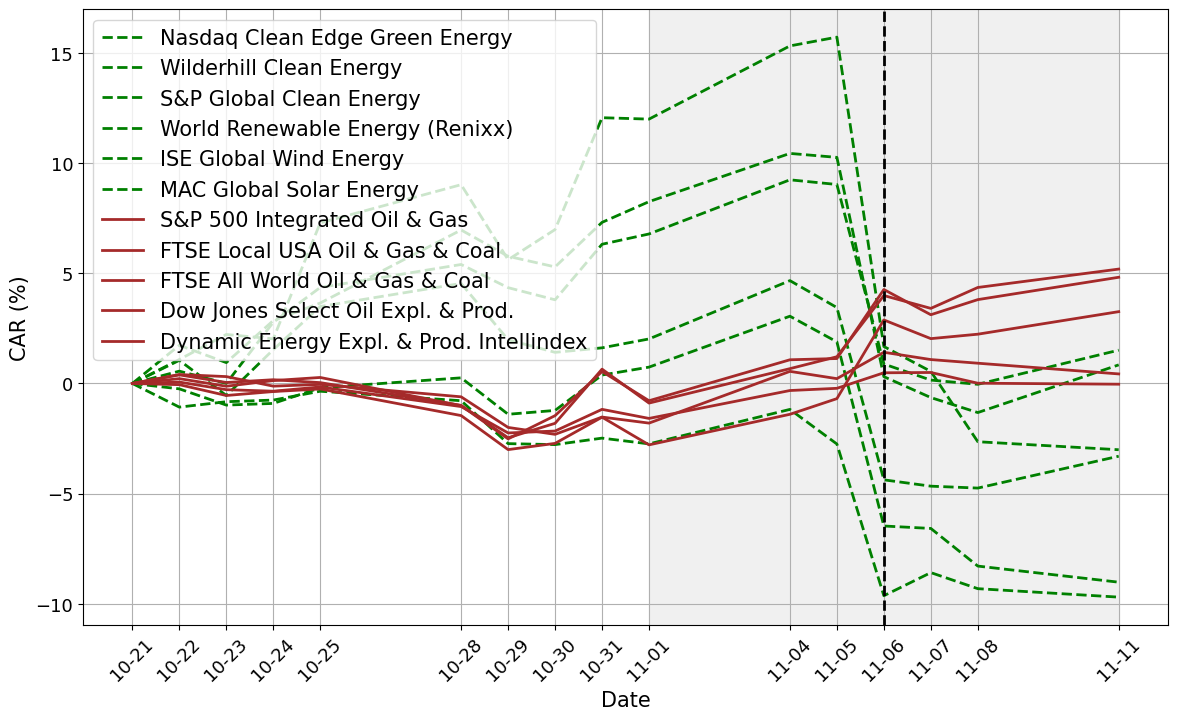

In [21]:
no_estimation_CAR = calculate_car_for_plot(estimation_data, between_data, event_data)
no_estimation_CAR = no_estimation_CAR[['CELS Index', 'ECO Index', 'SPGTCED Index', 'RENIXX Index', 'GWE Index',
       'SUNIDX Index', 'SPXIOGUP Index', 'FA0530U Index', 'AWOGPU Index',
       'DJSOEP Index', 'EZKTR Index']]
plot_cumulative_returns(no_estimation_CAR, event_date, event_start_date, event_end_date)

In [22]:
def plot_cumulative_returns_factor(cumulative_returns, event_date, event_start_date, event_end_date):
    # Rename the columns for the plot
    cumulative_returns.columns = ['Green factor', 'Brown factor']  # Example column names

    # List of assets for dashed green line and simple brown line
    dashed_green_assets = ['Green factor']
    simple_brown_assets = ['Brown factor']

    # Ensure all values are zero at the first date
    cumulative_returns = cumulative_returns - cumulative_returns.iloc[0]

    # Multiply y-axis values by 100 to show in percent
    cumulative_returns *= 100

    # Plot all columns in the merged data frame with specified line styles for chosen columns
    plt.figure(figsize=(14, 8))
    for column in cumulative_returns.columns:
        if column in dashed_green_assets:
            plt.plot(cumulative_returns.index, cumulative_returns[column], label=column, linestyle='--', color='green', linewidth=2)
        elif column in simple_brown_assets:  # Example chosen column for simple brown line
            plt.plot(cumulative_returns.index, cumulative_returns[column], label=column, linestyle='-', color='brown', linewidth=2)

    # Add grid lines
    plt.grid(True)

    # Add a vertical line to a given date
    vertical_line_date = event_date  # Example date for vertical line
    plt.axvline(x=vertical_line_date, color='black', linestyle='--', linewidth=2)

    # Grey out the area between two dates
    start_grey_date = event_start_date  # Start date for greyed out area
    end_grey_date = event_end_date   # End date for greyed out area
    plt.axvspan(start_grey_date, end_grey_date, color='#F0F0F0')

    # Format x-axis dates to show only month and day, and rotate by 90 degrees
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator())
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(fontsize=18)
    plt.gca().set_xticks(cumulative_returns.index)

    plt.xlabel('Date', fontsize=20)
    plt.ylabel('CAR (%)', fontsize=20)

    # Set the minimum and maximum value of y-axis values
    #plt.ylim(-12.5, 12.5)  # Example range: -50% to 150%

    plt.legend(fontsize=20)

    # Save the plot as a PDF file in .eps format for use in LaTeX
    plt.savefig("cumulative_returns_plot.png", format='png')

    plt.show()

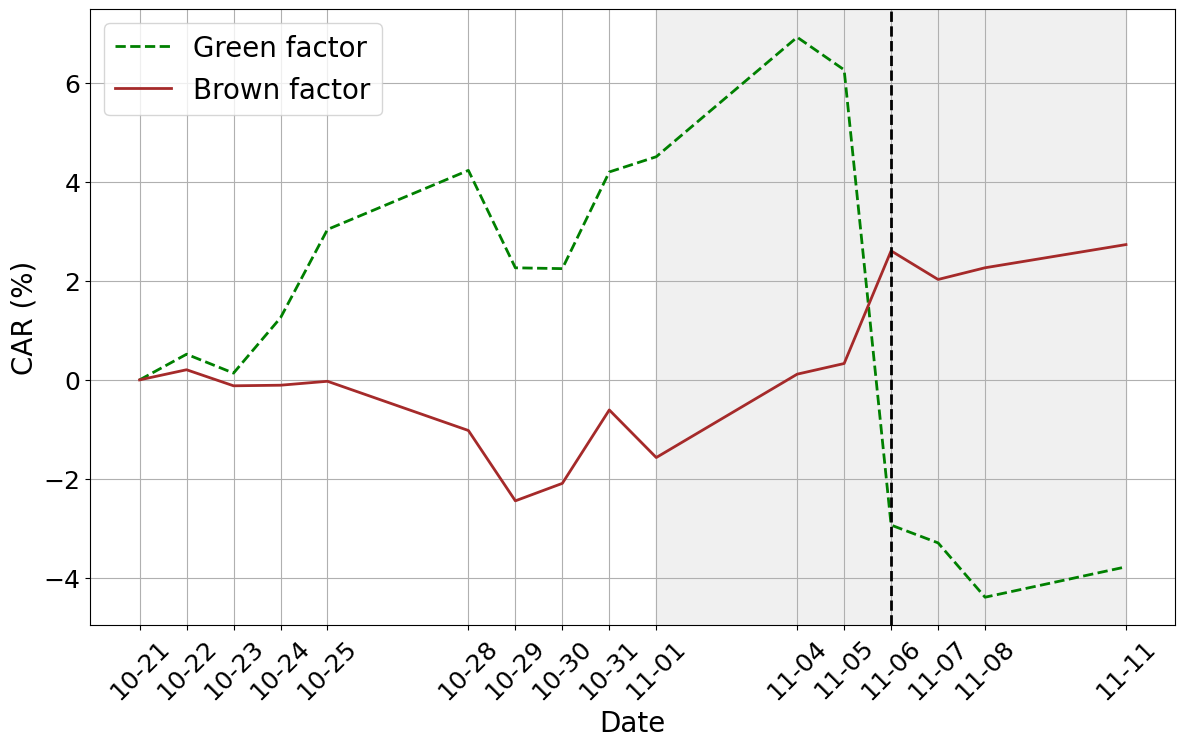

In [23]:
no_estimation_CAR = calculate_car_for_plot(estimation_data, between_data, event_data)
no_estimation_CAR = no_estimation_CAR[['green factor', 'brown factor']]
plot_cumulative_returns_factor(no_estimation_CAR, event_date, event_start_date, event_end_date)

In [24]:
# CALCULATE CUMULATIVE RETURNS - WORKS IF ESTIMIATION - EVENT GAP = 1 (not CAR)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


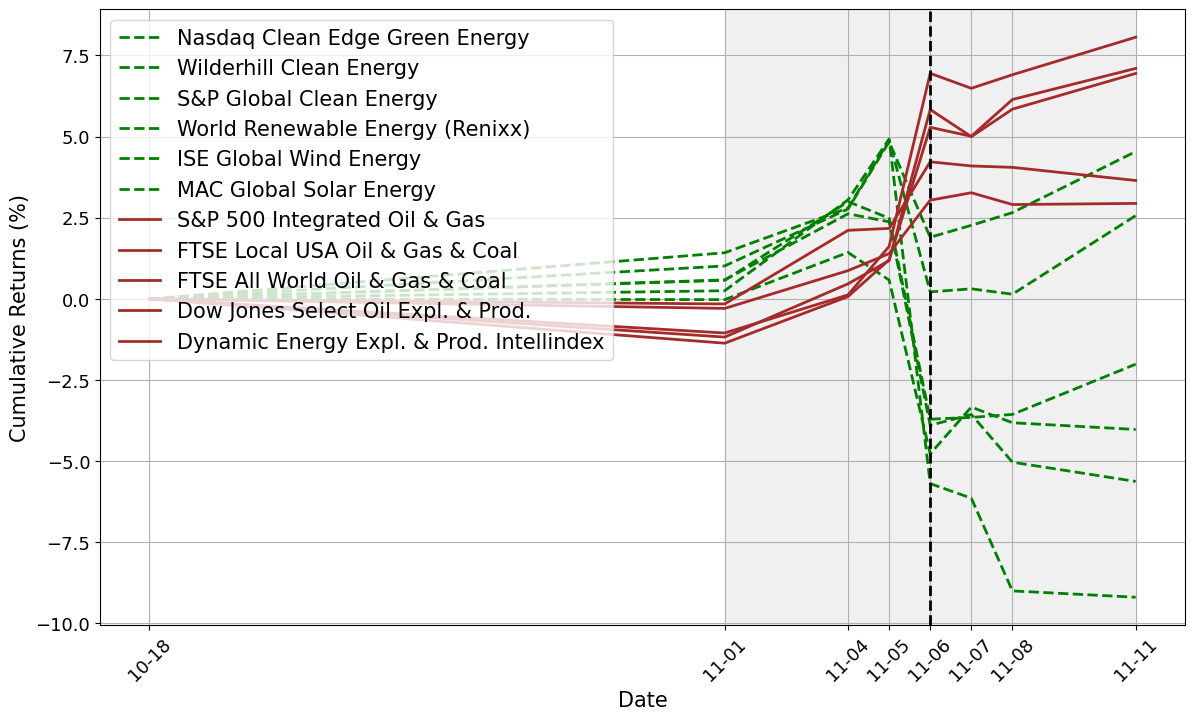

In [25]:
# Merge the estimation and event data
merged_data = pd.concat([estimation_data, event_data])
merged_data = merged_data[['CELS Index', 'ECO Index', 'SPGTCED Index', 'RENIXX Index', 'GWE Index',
       'SUNIDX Index', 'SPXIOGUP Index', 'FA0530U Index', 'AWOGPU Index',
       'DJSOEP Index', 'EZKTR Index']]
# merged_data = merged_data[['green factor', 'brown factor', 'green - brown']]

# Function to calculate cumulative returns starting from a specific date
def calculate_cumulative_returns(data, start_date):
    # Filter data from the start date
    filtered_data = data.loc[start_date:].copy()
    # Calculate cumulative returns where the first day is 0 for all assets
    filtered_data.iloc[0] = 0
    cumulative_returns = filtered_data.cumsum()
    return cumulative_returns

# User-defined start date for cumulative returns calculation
start_index = event_index - event_before - 10   # You can change this date as needed
start_date = df.index[start_index]

# Calculate cumulative returns from the user-defined start date
cumulative_returns = calculate_cumulative_returns(merged_data, start_date)


# Rename the columns for the plot
cumulative_returns.columns = ['Nasdaq Clean Edge Green Energy', 'Wilderhill Clean Energy', 'S&P Global Clean Energy', 'World Renewable Energy (Renixx)', 'ISE Global Wind Energy', 'MAC Global Solar Energy',
                             'S&P 500 Integrated Oil & Gas', 'FTSE Local USA Oil & Gas & Coal', 'FTSE All World Oil & Gas & Coal', 'Dow Jones Select Oil Expl. & Prod.', 'Dynamic Energy Expl. & Prod. Intellindex']  # Example column names

# List of assets for dashed green line and simple brown line
dashed_green_assets = ['Nasdaq Clean Edge Green Energy', 'Wilderhill Clean Energy', 'S&P Global Clean Energy', 'World Renewable Energy (Renixx)', 'ISE Global Wind Energy', 'MAC Global Solar Energy']  # Example list of assets for dashed green line
simple_brown_assets = ['S&P 500 Integrated Oil & Gas', 'FTSE Local USA Oil & Gas & Coal', 'FTSE All World Oil & Gas & Coal', 'Dow Jones Select Oil Expl. & Prod.', 'Dynamic Energy Expl. & Prod. Intellindex']  # Example list of assets for simple brown line


# Multiply y-axis values by 100 to show in percent
cumulative_returns *= 100

# Plot all columns in the merged data frame with specified line styles for chosen columns
plt.figure(figsize=(14, 8))
for column in cumulative_returns.columns:
    if column in dashed_green_assets:
        plt.plot(cumulative_returns.index, cumulative_returns[column], label=column, linestyle='--', color='green', linewidth=2)
    elif column in simple_brown_assets:  # Example chosen column for simple brown line
        plt.plot(cumulative_returns.index, cumulative_returns[column], label=column, linestyle='-', color='brown', linewidth=2)

# Add grid lines
plt.grid(True)

# Add a vertical line to a given date
vertical_line_date = event_date  # Example date for vertical line
plt.axvline(x=vertical_line_date, color='black', linestyle='--', linewidth=2)

# Grey out the area between two dates
start_grey_date = event_start_date  # Start date for greyed out area
end_grey_date = event_end_date   # End date for greyed out area
plt.axvspan(start_grey_date, end_grey_date, color='#F0F0F0')

# Format x-axis dates to show only month and day, and rotate by 90 degrees
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator())
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.gca().set_xticks(cumulative_returns.index)

plt.xlabel('Date', fontsize=15)
plt.ylabel('Cumulative Returns (%)', fontsize=15)

# Set the minimum and maximum value of y-axis values
#plt.ylim(-12.5, 12.5)  # Example range: -50% to 150%

plt.legend(fontsize=15)


# Save the plot as a PDF file in .eps format for use in LaTeX
plt.savefig("cumulative_returns_plot.eps", format='eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


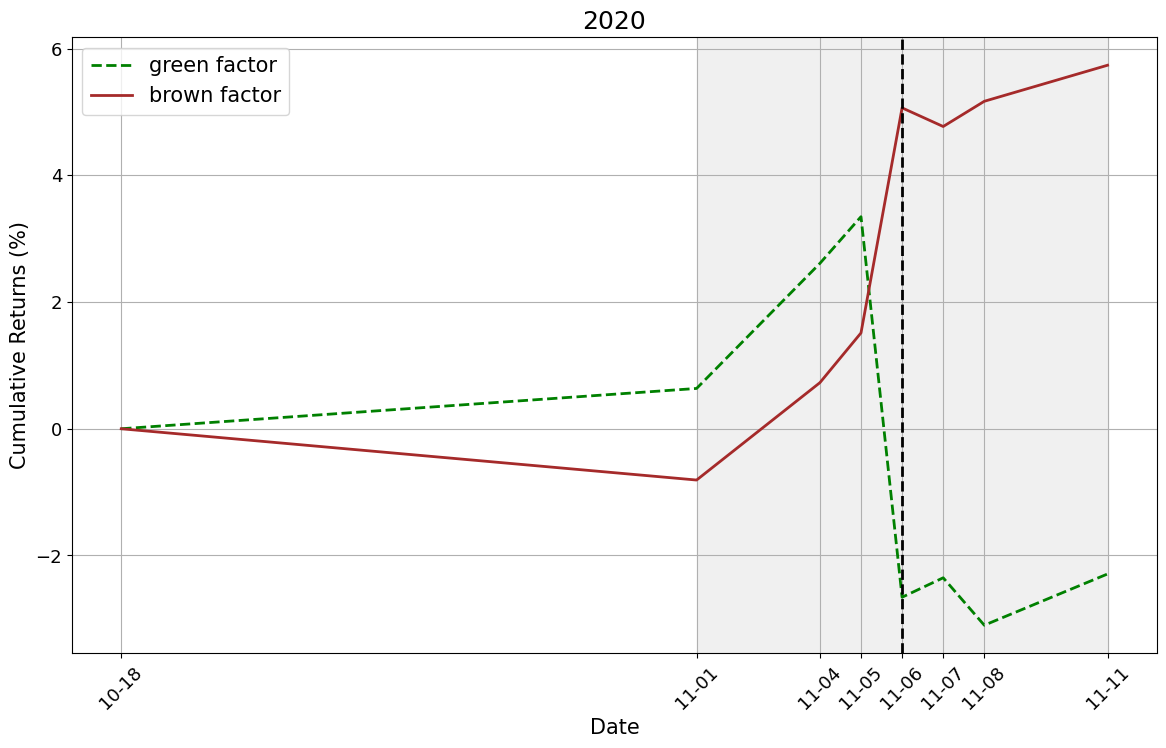

In [26]:
# Merge the estimation and event data
merged_data = pd.concat([estimation_data, event_data])
merged_data = merged_data[['green factor', 'brown factor']]

# Function to calculate cumulative returns starting from a specific date
def calculate_cumulative_returns(data, start_date):
    # Filter data from the start date
    filtered_data = data.loc[start_date:].copy()
    # Calculate cumulative returns where the first day is 0 for all assets
    filtered_data.iloc[0] = 0
    cumulative_returns = filtered_data.cumsum()
    return cumulative_returns

# User-defined start date for cumulative returns calculation
start_index = event_index - event_before - 10   # You can change this date as needed
start_date = df.index[start_index]

# Calculate cumulative returns from the user-defined start date
cumulative_returns = calculate_cumulative_returns(merged_data, start_date)


# List of assets for dashed green line and simple brown line
dashed_green_assets = ['green factor']  # Example list of assets for dashed green line
simple_brown_assets = ['brown factor']  # Example list of assets for simple brown line


# Multiply y-axis values by 100 to show in percent
cumulative_returns *= 100

# Plot all columns in the merged data frame with specified line styles for chosen columns
plt.figure(figsize=(14, 8))
for column in cumulative_returns.columns:
    if column in dashed_green_assets:
        plt.plot(cumulative_returns.index, cumulative_returns[column], label=column, linestyle='--', color='green', linewidth=2)
    elif column in simple_brown_assets:  # Example chosen column for simple brown line
        plt.plot(cumulative_returns.index, cumulative_returns[column], label=column, linestyle='-', color='brown', linewidth=2)
    else:
        plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)

# Add grid lines
plt.grid(True)

# Add a vertical line to a given date
vertical_line_date = event_date  # Example date for vertical line
plt.axvline(x=vertical_line_date, color='black', linestyle='--', linewidth=2)

# Grey out the area between two dates
start_grey_date = event_start_date  # Start date for greyed out area
end_grey_date = event_end_date   # End date for greyed out area
plt.axvspan(start_grey_date, end_grey_date, color='#F0F0F0')

# Format x-axis dates to show only month and day, and rotate by 90 degrees
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator())
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.gca().set_xticks(cumulative_returns.index)


plt.xlabel('Date', fontsize=15)
plt.ylabel('Cumulative Returns (%)', fontsize=15)

# Set the minimum and maximum value of y-axis values
# plt.ylim(-10, 5)  # Example range: -50% to 150%

plt.legend(fontsize=15)

plt.title("2020", fontsize=18)

# Save the plot as a PDF file in .eps format for use in LaTeX
plt.savefig("cumulative_factor_returns_plot.eps", format='eps')

plt.show()

In [27]:
# Non standard errors (create functions)

In [28]:
# Define the event and estimation windows
event_date = datetime(2016, 11, 9)
event_before = 3
event_after = 3

# Predefined lists for estimation window length and event_estimation_between parameters
estimation_window_lengths = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
event_estimation_between_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40]


# Main execution
results_list = []

for estimation_window in estimation_window_lengths:
    for event_estimation_between in event_estimation_between_list:
        # Calculate the start and end dates for the event window
        event_index = df.index.get_loc(event_date) 
        event_start_index = event_index - event_before
        event_end_index = event_index + event_after

        event_start_date = df.index[event_start_index]
        event_end_date = df.index[event_end_index]

        # Select the event window
        event_data = df.loc[event_start_date:event_end_date]

        # Calculate the end date for the estimation window
        estimation_end_index = event_index - event_before - event_estimation_between 
        estimation_end_date = df.index[estimation_end_index]

        # Select the estimation window
        estimation_data = df.loc[:estimation_end_date].iloc[-estimation_window:]


        
        # Construct green, brown and green-brown factors
        estimation_data['green factor'] = estimation_data[['CELS Index', 'ECO Index', 'SPGTCED Index', 'RENIXX Index', 'GWE Index',
               'SUNIDX Index']].mean(axis=1)
        estimation_data['brown factor'] = estimation_data[['SPXIOGUP Index', 'FA0530U Index', 'AWOGPU Index',
               'DJSOEP Index', 'EZKTR Index']].mean(axis=1)

        event_data['green factor'] = event_data[['CELS Index', 'ECO Index', 'SPGTCED Index', 'RENIXX Index', 'GWE Index',
               'SUNIDX Index']].mean(axis=1)

        event_data['brown factor'] = event_data[['SPXIOGUP Index', 'FA0530U Index', 'AWOGPU Index',
               'DJSOEP Index', 'EZKTR Index']].mean(axis=1)

        estimation_data['green - brown'] = estimation_data['green factor'] - estimation_data['brown factor'] 
        event_data['green - brown'] = event_data['green factor'] - event_data['brown factor'] 


        # Calculate expected returns
        expected_returns = calculate_expected_returns(estimation_data, event_data)
        
        # Calculate abnormal returns
        abnormal_returns = calculate_abnormal_returns(event_data, expected_returns)

         # Extract abnormal returns for the event day (as a Series)
        event_day_abnormal_returns_series = pd.Series(abnormal_returns).apply(lambda x: x.loc[event_date])

        # Store the results as a dictionary
        results_list.append({
            'Estimation Window': estimation_window,
            'Event Estimation Between': event_estimation_between,
            **event_day_abnormal_returns_series.to_dict()
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results_list)

# Export to Excel
results_df.to_excel('abnormal_returns_event_day.xlsx', index=False)
print("Data has been successfully exported to 'abnormal_returns_event_day.xlsx'.")


# Create a matrix with one specific column named "xxx"
matrix_df = results_df.pivot(index='Estimation Window', columns='Event Estimation Between', values='green - brown')

# Export to Excel
matrix_df.to_excel('abnormal_returns_matrix.xlsx')
print("Data has been successfully exported to 'abnormal_returns_matrix.xlsx'.")
        


Data has been successfully exported to 'abnormal_returns_event_day.xlsx'.
Data has been successfully exported to 'abnormal_returns_matrix.xlsx'.


In [29]:
def generate_heatmap(matrix_df, title=""):
    # Multiply all values by 100 to convert to percentages
    matrix_df = matrix_df * 100

    # Create a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(matrix_df, annot=True, fmt='.2f', cmap='Blues', cbar=False, annot_kws={"size": 16})
    
    # Add title and labels
    plt.title(title, fontsize=16)
    plt.xlabel('Days Between Estimation and Event Window', fontsize=20)
    plt.ylabel('Length of Estimation Window (Days)', fontsize=20)

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    # Show the heatmap
    # plt.show()
    
    plt.savefig("heatmap.png", format='png')
    plt.close()
    


    


generate_heatmap(matrix_df)